# 1. Imports & load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
ipl_df = pd.read_csv('C:/Users/neera/Mad About Sports/Advanced Cricket Analytics Masterclass/Datasets/IPL_ball_by_ball_updated.csv')

# 2. Sneak peek into the data

In [3]:
ipl_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ipl_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [5]:
ipl_df['innings'].unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [6]:
# Not considering super overs (innings 3 to 6)
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [7]:
ipl_df['innings'].unique()

array([2, 1], dtype=int64)

# 3. Additional columns
## 3.1 Total runs in each ball

In [8]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

## 3.2 Is there a wicket in that ball

In [9]:
ipl_df['player_dismissed'].unique()

array([nan, 'JH Kallis', 'W Jaffer', 'V Kohli', 'R Dravid', 'Z Khan',
       'SB Joshi', 'AA Noffke', 'MV Boucher', 'B Akhil', 'CL White',
       'SC Ganguly', 'DJ Hussey', 'RT Ponting', 'M Kaif', 'DS Lehmann',
       'M Rawat', 'RA Jadeja', 'SR Watson', 'YK Pathan', 'T Kohli',
       'SK Warne', 'V Sehwag', 'KC Sangakkara', 'SK Raina', 'JDP Oram',
       'PA Patel', 'MS Dhoni', 'ML Hayden', 'JR Hopes', 'Yuvraj Singh',
       'K Goel', 'SB Styris', 'SB Bangar', 'WPUJC Vaas', 'A Symonds',
       'AS Yadav', 'Y Venugopal Rao', 'PP Ojha', 'VVS Laxman',
       'RG Sharma', 'AC Gilchrist', 'Mohammad Hafeez', 'WP Saha',
       'BB McCullum', 'PR Shah', 'AM Nayar', 'RV Uthappa', 'DJ Thornely',
       'L Ronchi', 'ST Jayasuriya', 'LRPL Taylor', 'SM Pollock',
       'S Chanderpaul', 'Kamran Akmal', 'DPMD Jayawardene', 'IK Pathan',
       'S Sohal', 'B Lee', 'G Gambhir', 'Shahid Afridi', 'MA Khote',
       'Harbhajan Singh', 'DJ Bravo', 'MEK Hussey', 'GC Smith',
       'D Salunkhe', 'SS Tiwary',

In [10]:
type(ipl_df['player_dismissed'].unique()[0]), type(ipl_df['player_dismissed'].unique()[1])

(float, str)

In [11]:
# isOut[x] will be 1 if type(isOut[x]) matches type('str') which is a string
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [12]:
ipl_df['isOut'].unique()

array([0, 1], dtype=int64)

# 4. Choose teams

In [13]:
# t1 - bat first, t2 - bat second
# Eg: MI vs RCB, (match_id: 1254058) 

t1 = 'Mumbai Indians'
t2 = 'Royal Challengers Bangalore'

## 4.1 Choose a match b/w these teams

In [14]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([ 335985,  392208,  392218,  419119,  419157,  419162,  548360,
        598033,  729287,  733983,  829737, 1136574, 1175362, 1254058,
       1304064], dtype=int64)

In [15]:
required_match_id = 1254058

In [16]:
mdf = ipl_df[ipl_df.match_id == required_match_id]

In [17]:
mdf.reset_index(inplace = True, drop = True)

In [18]:
mdf.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,GJ Maxwell,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.6,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


## 4.2 Outcomes
0, 1, 2, 3, 4, 5, 6, 7, 'W', 'extras'

In [19]:
# Ignoring 5 as it is a rare occurrence
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [20]:
100 * ipl_df[ipl_df.batting_team == t1].total_runs.value_counts(normalize = True)

1    40.781379
0    35.881570
4    11.504839
2    6.191316 
6    5.047307 
3    0.374141 
5    0.194266 
7    0.025183 
Name: total_runs, dtype: float64

5 and 7 each contribute to less than 0.2% of the total runs scored by MI. So, we shall ignore these in the outcomes.

In [21]:
t1_outcomes_count = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [22]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [23]:
for outcome in outcomes:
    print(outcome)

0
1
2
3
4
6
w


In [24]:
t1_outcomes_count

1    11336
0    9974 
4    3198 
2    1721 
6    1403 
3    104  
5    54   
7    7    
Name: total_runs, dtype: int64

In [25]:
# Total no. of wickets lost, this is very close to the total no. of 6s
t1_outs

1378

In [26]:
t1_outcomes = []
t2_outcomes = []

for outcome in outcomes:
    if outcome != 'w':
        t1_outcomes.append(t1_outcomes_count[outcome])
        t2_outcomes.append(t2_outcomes_count[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)

In [27]:
t1_outcomes, t2_outcomes

([9974, 11336, 1721, 104, 3198, 1403, 1378],
 [9331, 10900, 1764, 91, 2983, 1365, 1304])

## 4.3 Probability of outcomes

In [28]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [29]:
t1_pb_outcomes

[0.3425843236930686,
 0.3893659407845023,
 0.05911245448924916,
 0.003572164594353232,
 0.10984406127636188,
 0.04818987428728447,
 0.047331180875180325]

In [30]:
t1_pb_ls = np.cumsum(t1_pb_outcomes)
t2_pb_ls = np.cumsum(t2_pb_outcomes)

In [31]:
t1_pb_ls, t2_pb_ls

(array([0.34258432, 0.73195026, 0.79106272, 0.79463488, 0.90447894,
        0.95266882, 1.        ]),
 array([0.33639772, 0.72936044, 0.79295551, 0.79623621, 0.90377821,
        0.95298868, 1.        ]))

## 4.4 Runs prediction

In [32]:
np.random.random()

0.6022419500012014

In [33]:
# Run it for 120 balls and determine runs

# first innings
pred_runs = 0
pred_wks = 0
balls = 120

i1p_0 = t1_pb_ls[0] # innings 1, probability of dot
i1p_1 = t1_pb_ls[1] # innings 1, probability of 1
i1p_2 = t1_pb_ls[2] # innings 1, probability of 2
i1p_3 = t1_pb_ls[3] # innings 1, probability of 3
i1p_4 = t1_pb_ls[4] # innings 1, probability of 4
i1p_6 = t1_pb_ls[5] # innings 1, probability of 6
i1p_w = 1           # innings 1, probability of 'w'

i2p_0 = t2_pb_ls[0] # innings 2, probability of dot
i2p_1 = t2_pb_ls[1] # innings 2, probability of 1
i2p_2 = t2_pb_ls[2] # innings 2, probability of 2
i2p_3 = t2_pb_ls[3] # innings 2, probability of 3
i2p_4 = t2_pb_ls[4] # innings 2, probability of 4
i2p_6 = t2_pb_ls[5] # innings 2, probability of 6
i2p_w = 1           # innings 2, probability of 'w'

for i in range(balls):
    r_value = np.random.random()

    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        if pred_wks == 10:
            break

In [34]:
pred_runs, pred_wks

(169, 3)

# 5. Function: Runs prediction
## 5.1 Converting overs to balls

In [35]:
over_ball = 3.1

In [36]:
str(over_ball)

'3.1'

In [37]:
str(over_ball).split('.')

['3', '1']

In [38]:
over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

In [39]:
print(over_no, ball_no)

3 1


In [40]:
# Number of balls
print(6 * over_no + ball_no)

19


## 5.2 1st innings run prediction

In [41]:
def innings_1_runs(curr_score, curr_wickets, curr_overs):
    # initialise
    pred_runs = curr_score
    pred_wks  = curr_wickets
    over_ball = curr_overs
    
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    leftover_balls = 120 - (6 * over_no + ball_no)

    i1p_0 = t1_pb_ls[0] # innings 1, probability of dot
    i1p_1 = t1_pb_ls[1] # innings 1, probability of 1
    i1p_2 = t1_pb_ls[2] # innings 1, probability of 2
    i1p_3 = t1_pb_ls[3] # innings 1, probability of 3
    i1p_4 = t1_pb_ls[4] # innings 1, probability of 4
    i1p_6 = t1_pb_ls[5] # innings 1, probability of 6
    i1p_w = 1           # innings 1, probability of 'w'

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
                
    return pred_runs

In [42]:
innings_1_runs(140, 4, 15.0)

184

## 5.3 2nd innings runs prediction 

In [43]:
def innings_2_runs(curr_score, curr_wickets, curr_overs, target):
    # initialise
    pred_runs = curr_score
    pred_wks  = curr_wickets
    over_ball = curr_overs
    
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    leftover_balls = 120 - (6 * over_no + ball_no)

    i2p_0 = t2_pb_ls[0] # innings 2, probability of dot
    i2p_1 = t2_pb_ls[1] # innings 2, probability of 1
    i2p_2 = t2_pb_ls[2] # innings 2, probability of 2
    i2p_3 = t2_pb_ls[3] # innings 2, probability of 3
    i2p_4 = t2_pb_ls[4] # innings 2, probability of 4
    i2p_6 = t2_pb_ls[5] # innings 2, probability of 6
    i2p_w = 1           # innings 2, probability of 'w'

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        if pred_runs > target:
            break
                
    return pred_runs

In [44]:
innings_2_runs(140, 4, 19.0, 150)

147

# 6. Runs prediction for MI vs RCB match

In [45]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [46]:
df_ing1.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
124,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.6,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
126,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,5.4,Mumbai Indians,Royal Challengers Bangalore,CA Lynn,SA Yadav,YS Chahal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [47]:
df_ing1.sort_values('ball', ascending = True, inplace = True)

In [48]:
df_ing2.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,GJ Maxwell,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.6,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [49]:
df_ing2.sort_values('ball', ascending = True, inplace = True)

In [50]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [51]:
df_ing1.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
1,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",1,0.2,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,CA Lynn,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [52]:
df_ing2.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,0.1,Royal Challengers Bangalore,Mumbai Indians,Washington Sundar,V Kohli,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,0.2,Royal Challengers Bangalore,Mumbai Indians,Washington Sundar,V Kohli,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## 6.1 Runs prediction: 1st innings

In [53]:
curr_score   = 0
curr_wickets = 0
curr_overs   = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score   += df_ing1.total_runs[i]
    curr_wickets += df_ing1.isOut[i]
    curr_overs    = df_ing1.ball[i]
    
    prediction = innings_1_runs(curr_score, curr_wickets, curr_overs)
    ing1_runs_pred.append(prediction)

In [54]:
ing1_runs_pred

[146,
 187,
 150,
 143,
 150,
 122,
 164,
 149,
 146,
 142,
 128,
 154,
 106,
 135,
 118,
 177,
 120,
 134,
 161,
 168,
 158,
 154,
 163,
 131,
 155,
 121,
 152,
 121,
 145,
 158,
 136,
 108,
 154,
 140,
 155,
 134,
 137,
 133,
 154,
 157,
 152,
 154,
 181,
 179,
 154,
 159,
 171,
 156,
 168,
 155,
 157,
 166,
 171,
 149,
 163,
 186,
 162,
 170,
 185,
 171,
 154,
 170,
 160,
 171,
 163,
 177,
 172,
 169,
 145,
 176,
 156,
 170,
 153,
 152,
 168,
 152,
 169,
 162,
 160,
 158,
 169,
 159,
 166,
 153,
 174,
 161,
 150,
 167,
 161,
 163,
 173,
 178,
 161,
 163,
 153,
 176,
 170,
 162,
 164,
 161,
 170,
 158,
 168,
 171,
 157,
 174,
 165,
 169,
 164,
 169,
 157,
 152,
 156,
 161,
 159,
 159,
 170,
 165,
 160,
 162,
 160,
 161,
 159,
 159]

In [55]:
ing1_actual_score = sum(df_ing1.total_runs)
ing1_actual_score

159

## 6.2 Plotting predicted score vs actual score: 1st innings

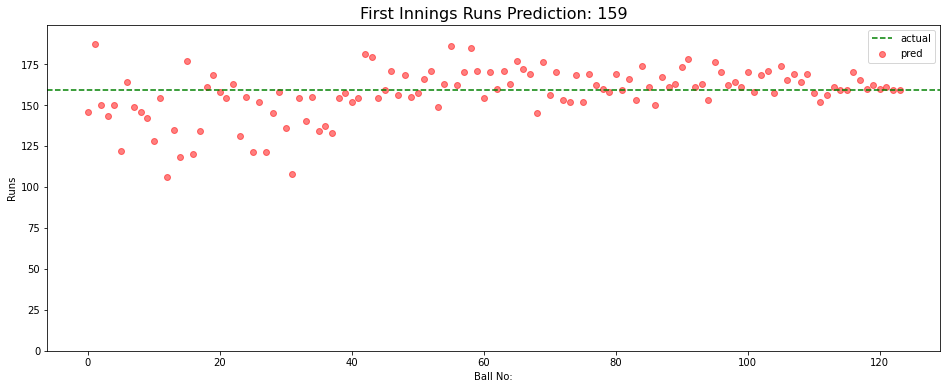

In [56]:
x_values = [i for i in range(len(df_ing1))]
y_values = ing1_runs_pred

plt.figure(figsize = (16,6))
plt.scatter(x_values, y_values, color = 'r', alpha = 0.5, label = 'pred')
plt.axhline(ing1_actual_score, ls = '--', color = 'g', label = 'actual')
plt.ylim(0, ing1_actual_score + 40)
plt.title('First Innings Runs Prediction: ' + str(ing1_actual_score), fontsize = 16)
plt.xlabel('Ball No:')
plt.ylabel('Runs')
plt.legend()
plt.show()

## 6.3 Measuring error: 1st innings

In [57]:
error_ing1_ls = [abs(i - ing1_actual_score) for i in ing1_runs_pred]

In [58]:
# Mean absolute error
np.mean(error_ing1_ls)

10.92741935483871

## 6.4 Runs prediction: 2nd innings

In [59]:
target       = ing1_actual_score
curr_score   = 0
curr_wickets = 0
curr_overs   = 0.0

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score   += df_ing2.total_runs[i]
    curr_overs    = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_score, curr_wickets, curr_overs, target)
    ing2_runs_pred.append(prediction)

In [60]:
ing2_actual_score = sum(df_ing2.total_runs)
ing2_actual_score

160

## 6.5 Plotting predicted score vs actual score: 2nd innings

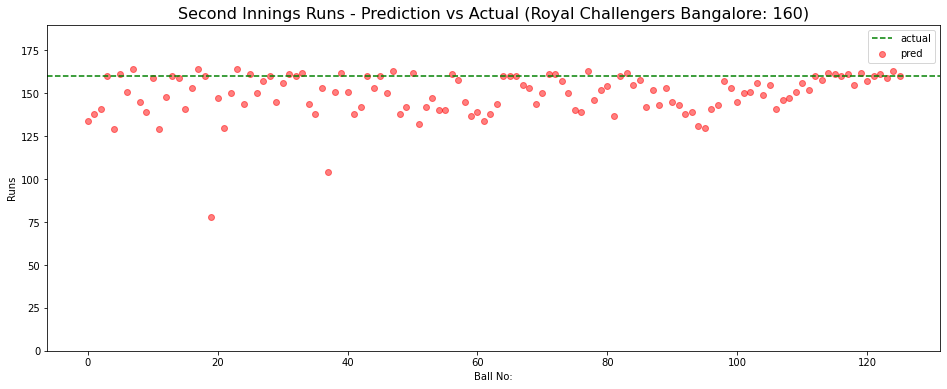

In [61]:
x_values = [i for i in range(len(ing2_runs_pred))]
y_values = ing2_runs_pred

plt.figure(figsize = (16, 6))
plt.scatter(x_values, y_values, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No:')
plt.ylabel('Runs')
plt.legend()
plt.show()

## 6.6 Measuring error: 2nd innings

In [62]:
error_ing2_ls = [abs(i - ing2_actual_score) for i in ing2_runs_pred]

In [63]:
# Mean absolute error
np.mean(error_ing2_ls)

11.03968253968254

# 7. Win predictions
## 7.1 1st innings

In [64]:
# For each ball make a prediction: 1st innings runs, 2nd innings runs, win/lose/tie

# Initialise win/tie/lose counts
win_count  = 0
tie_count  = 0
lose_count = 0

# Sum of win_count_ls[i], tie_count_ls[i] and lose_count_ls[i] should be 100% for every ball i
win_count_ls  = [] # Win % for chasing team for every ball
tie_count_ls  = []
lose_count_ls = []

ing1_curr_score   = 0
ing1_curr_overs   = 0
ing1_curr_wickets = 0

# Each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score   += df_ing1.total_runs[i]
    ing1_curr_overs    = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    # 2nd innings values
    ing2_curr_score   = 0
    ing2_curr_wickets = 0
    ing2_curr_overs   = 0.0
    
    # Make a prediction for 100 times & get win/lose/tie count (eg: 28% win)
    for j in range(100):
        ing1_runs_prediction = innings_1_runs(ing1_curr_score, ing1_curr_wickets, ing1_curr_overs)
        target = ing1_runs_prediction
        
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        # Prediction w.r.t 2nd team
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    # Initialise the counts to 0 before the next ball
    win_count  = 0
    tie_count  = 0
    lose_count = 0

In [65]:
win_count_ls

[54,
 40,
 52,
 46,
 55,
 51,
 58,
 52,
 56,
 69,
 58,
 65,
 71,
 70,
 65,
 75,
 70,
 70,
 67,
 64,
 67,
 58,
 60,
 59,
 47,
 58,
 57,
 68,
 59,
 67,
 76,
 67,
 58,
 58,
 64,
 45,
 61,
 59,
 52,
 38,
 43,
 50,
 48,
 30,
 29,
 39,
 37,
 41,
 34,
 28,
 33,
 33,
 25,
 30,
 22,
 25,
 24,
 28,
 30,
 23,
 28,
 35,
 28,
 24,
 33,
 29,
 26,
 31,
 36,
 28,
 27,
 43,
 34,
 29,
 39,
 38,
 32,
 36,
 39,
 36,
 36,
 34,
 18,
 28,
 31,
 16,
 25,
 16,
 25,
 26,
 21,
 24,
 20,
 26,
 22,
 16,
 20,
 23,
 21,
 16,
 19,
 22,
 24,
 12,
 21,
 27,
 28,
 19,
 19,
 31,
 31,
 35,
 34,
 23,
 27,
 17,
 19,
 25,
 28,
 30,
 26,
 29,
 28,
 30]

## 7.2 Win predictions: 2nd Innings

In [66]:
# 1st innings values
target = ing1_actual_score

# 2nd innings values
ing2_curr_score   = 0
ing2_curr_wickets = 0
ing2_curr_overs   = 0.0

for i in range(len(df_ing2)):
    ing2_curr_score   += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs    = df_ing2.ball[i]
    
    # Make a prediction for 100 times & get win/lose/tie count (eg: 28% win)
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        # Prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count  = 0
    tie_count  = 0
    lose_count = 0

In [67]:
len(win_count_ls), len(tie_count_ls), len(lose_count_ls)

(250, 250, 250)

In [68]:
win_count_ls

[54,
 40,
 52,
 46,
 55,
 51,
 58,
 52,
 56,
 69,
 58,
 65,
 71,
 70,
 65,
 75,
 70,
 70,
 67,
 64,
 67,
 58,
 60,
 59,
 47,
 58,
 57,
 68,
 59,
 67,
 76,
 67,
 58,
 58,
 64,
 45,
 61,
 59,
 52,
 38,
 43,
 50,
 48,
 30,
 29,
 39,
 37,
 41,
 34,
 28,
 33,
 33,
 25,
 30,
 22,
 25,
 24,
 28,
 30,
 23,
 28,
 35,
 28,
 24,
 33,
 29,
 26,
 31,
 36,
 28,
 27,
 43,
 34,
 29,
 39,
 38,
 32,
 36,
 39,
 36,
 36,
 34,
 18,
 28,
 31,
 16,
 25,
 16,
 25,
 26,
 21,
 24,
 20,
 26,
 22,
 16,
 20,
 23,
 21,
 16,
 19,
 22,
 24,
 12,
 21,
 27,
 28,
 19,
 19,
 31,
 31,
 35,
 34,
 23,
 27,
 17,
 19,
 25,
 28,
 30,
 26,
 29,
 28,
 30,
 31,
 26,
 32,
 29,
 38,
 33,
 37,
 37,
 33,
 24,
 34,
 28,
 33,
 29,
 30,
 32,
 31,
 28,
 24,
 25,
 26,
 25,
 28,
 27,
 38,
 38,
 29,
 28,
 32,
 26,
 33,
 40,
 42,
 42,
 44,
 30,
 20,
 21,
 26,
 17,
 21,
 19,
 20,
 25,
 20,
 28,
 31,
 31,
 36,
 27,
 27,
 34,
 26,
 25,
 14,
 18,
 21,
 34,
 27,
 19,
 29,
 28,
 14,
 17,
 17,
 36,
 38,
 28,
 34,
 32,
 30,
 37,
 32,
 44,
 35,
 36,


# 8. Win Percentage Chart

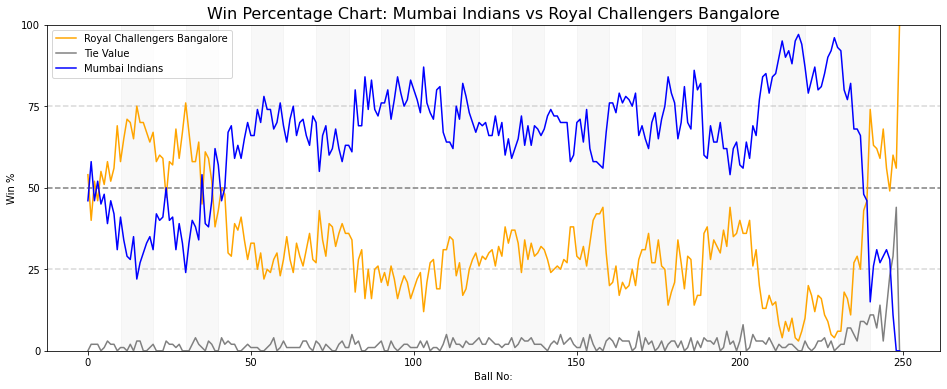

In [69]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')

plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])

# Add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No:')
plt.ylabel('Win %')
plt.legend()
plt.show()

# 9. Further scope
1. Determine impact points in a match - You can identify the 5 most impactful balls for RCB win as well as MI loss. Calculate the deltas in win % for each ball and each team. Then, find the 5 maximum values of deltas.
2. Consider different probabilities (of dots, singles etc.) for different phases of an innings - powerplay, middle overs and death overs.
3. Consider the venue of the match.
4. Consider which batsman is at strike.
5. Improve the performance of the existing model.
6. Construct 6 different ML models for runs, wickets and overs in each innings to predict the win %.